In [156]:
%matplotlib inline

import os
import pickle
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

max_len = 50

In [186]:
def load_data(path):
    
    gradient_buffer = [[], [], [], [], [], [], [], [], [], []]
    
    dir_length = len(path)
    for path, subdirs, files in os.walk(path):
        for f in files:
            if 'param_value' not in f:
                continue
            else:
                index = int(f[-3])
                if len(gradient_buffer[index]) < max_len:
                    params = pickle.load( open( path+f, "rb" ) )
                    gradient_buffer[index].append(params)
#     for index in range(10):
#         print(index, len(gradient_buffer[index]))

    return gradient_buffer

In [197]:
def plot_data(g_buffer):
    rainbow = cm.rainbow(np.linspace(0, 1, len(gradient_buffer)))
    training, texting, color = [], [], []
    index = 5
    sub_m = 4
    for t in range(len(gradient_buffer)-1):
        for i in range(max_len):
#             print(t, i, g_buffer[t][i][sub_m][0][index])
            training.append(g_buffer[t][i][sub_m][0][index])
            color.append(np.array(rainbow[t]))
    for i in range(max_len):
#         print(g_buffer[9][i][sub_m][0][index])
        texting.append(g_buffer[9][i][sub_m][0][index])

    for i in range(len(gradient_buffer)-1):
        start = max_len*i
        end = start + max_len
        print(i, np.mean(training[start:end]), np.std(training[start:end]))
        plt.scatter(range(len(training))[start:end],training[start:end], c=rainbow[i],s=1)   

    print(9, np.mean(texting), np.std(texting))
#     print(rainbow)
    plt.scatter(range(len(texting)),texting, c='r', s=1)            

    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

['module.encoder.0.weight', 'module.encoder.0.bias', 'module.encoder.1.weight', 'module.encoder.1.bias', 'module.mu.weight', 'module.mu.bias', 'module.logvar.weight', 'module.logvar.bias', 'module.decoder.0.weight', 'module.decoder.0.bias', 'module.decoder.1.weight', 'module.decoder.1.bias', 'module.decoder.3.weight', 'module.decoder.3.bias', 'lrs.0', 'lrs.1', 'lrs.2', 'lrs.3', 'lrs.4', 'lrs.5', 'lrs.6', 'lrs.7', 'lrs.8', 'lrs.9', 'lrs.10', 'lrs.11', 'lrs.12', 'lrs.13']
0 -0.0040152934 0.003242813
1 -0.0002355501 0.0017060293
2 -0.004010478 0.0038189886
3 -0.0003119293 0.0033703109
4 -0.0011138202 0.0038484293
5 0.0028428065 0.0029814013
6 -0.0026260493 0.0031869335
7 0.0017376484 0.0035536159
8 0.0010191039 0.0038037982
9 0.0022082257 0.0044163843


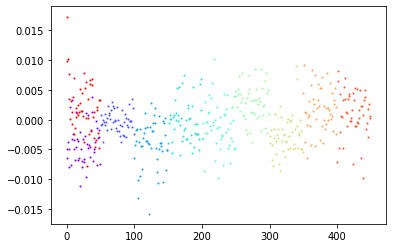

In [198]:
names = pickle.load( open( './result/param_name.p', "rb" ) )
print(names)

gradient_buffer = load_data('/home/xi/ml_space/meta_vae/result/')
plot_data(gradient_buffer)